<a href="https://www.kaggle.com/code/fakhrizalahadiat/eda-dc-marvel-comic-character?scriptVersionId=142224310" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comic-characters/comic_characters.csv


/kaggle/input/comic-characters/comic_characters.csv

In [2]:
data = pd.read_csv("/kaggle/input/comic-characters/comic_characters.csv")

In [3]:
data.head()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC


# Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21144 entries, 0 to 21143
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              21144 non-null  int64 
 1   Name            21144 non-null  object
 2   Identity        21144 non-null  object
 3   Alignment       21144 non-null  object
 4   Eyes            21144 non-null  object
 5   Hair            21144 non-null  object
 6   Sex             21144 non-null  object
 7   Alive           21144 non-null  object
 8   Appearances     21144 non-null  int64 
 9   First_appeared  21144 non-null  object
 10  Planet          21144 non-null  object
 11  Universe        21144 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.9+ MB


There are 21144 Comic Character data

In [5]:
categorical = ["Name","Identity","Alignment","Eyes","Hair","Sex","Alive","First_appeared","Planet","Universe"]
numeric = ["Id","Appearances"]

Separate column based on tipe of data

In [6]:
data[categorical].describe().T

,count,unique,top,freq
Name,21144,19959,Charlie,10
Identity,21144,5,Secret,10452
Alignment,21144,3,Bad,10250
Eyes,21144,24,Blue,6656
Hair,21144,20,Black,6688
Sex,21144,6,Male,14964
Alive,21144,2,Yes,16050
First_appeared,21144,899,"2006, September",103
Planet,21144,26,Earth-616,14607
Universe,21144,2,Marvel,14665


1. Mostly appear is DC Character and name is Charlie
2. Mostly Character traits is Bad
3. Mostly the character sex is Male

In [7]:
data[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,21144.0,10571.500000,6103.891382,0.0,5285.75,10571.5,15857.25,21143.0
Appearances,21144.0,19.329502,94.444348,1.0,1.00,4.0,10.00,4043.0


In [8]:
kondisi = data["First_appeared"].isin(["1988, Holiday"])

In [9]:
data[kondisi]

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
36,36,Fidel Castro,Public,Neutral,Black,White,Male,Yes,4,"1988, Holiday",New Earth,DC
14958,14958,Sally Milton,Public,Good,Auburn,Blond,Female,Yes,2,"1988, Holiday",New Earth,DC


It can be seen the First_appeared is Date Time Type and there is "Holiday" is not include in month and must be cleared

In [10]:
data[["Year","Month"]] = data["First_appeared"].str.split(",", expand = True) 

Separate Year and Month in First_appeared into its own column

In [11]:
data.head()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Year,Month
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel,2002,July
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel,1984,August
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC,1985,January
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC,2004,March
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC,1999,December


In [12]:
data.isna().sum()

Id                  0
Name                0
Identity            0
Alignment           0
Eyes                0
Hair                0
Sex                 0
Alive               0
Appearances         0
First_appeared      0
Planet              0
Universe            0
Year                0
Month             136
dtype: int64

After separate Month and Year there 136 missing value in Month Column and must be cleared

In [13]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21008 entries, 0 to 21143
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              21008 non-null  int64 
 1   Name            21008 non-null  object
 2   Identity        21008 non-null  object
 3   Alignment       21008 non-null  object
 4   Eyes            21008 non-null  object
 5   Hair            21008 non-null  object
 6   Sex             21008 non-null  object
 7   Alive           21008 non-null  object
 8   Appearances     21008 non-null  int64 
 9   First_appeared  21008 non-null  object
 10  Planet          21008 non-null  object
 11  Universe        21008 non-null  object
 12  Year            21008 non-null  object
 13  Month           21008 non-null  object
dtypes: int64(2), object(12)
memory usage: 2.4+ MB


Missing Value in Month Column is dropped and now amount of data is 21008

In [14]:
data["Month"]= data["Month"].str.replace(" ","")
data

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Year,Month
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel,2002,July
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel,1984,August
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC,1985,January
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC,2004,March
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC,1999,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21139,21139,Winslow Schott,Public,Bad,Blue,Brown,Male,Yes,74,"1943, September",New Earth,DC,1943,September
21140,21140,Jim Morita,Secret,Bad,Brown,Black,Male,Yes,4,"1967, January",Earth-616,Marvel,1967,January
21141,21141,Janet Grant,Public,Good,Brown,Black,Female,Yes,1,"2007, December",Earth-616,Marvel,2007,December
21142,21142,Miya Shimada,Secret,Good,Brown,Black,Female,Yes,46,"1984, May",New Earth,DC,1984,May


It can be seen value of Month Column have space and we remove it

In [15]:
kondisi = data["Month"] == "Holiday"
data = data[~kondisi].reset_index(drop = True)
data

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Year,Month
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel,2002,July
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel,1984,August
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC,1985,January
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC,2004,March
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC,1999,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21001,21139,Winslow Schott,Public,Bad,Blue,Brown,Male,Yes,74,"1943, September",New Earth,DC,1943,September
21002,21140,Jim Morita,Secret,Bad,Brown,Black,Male,Yes,4,"1967, January",Earth-616,Marvel,1967,January
21003,21141,Janet Grant,Public,Good,Brown,Black,Female,Yes,1,"2007, December",Earth-616,Marvel,2007,December
21004,21142,Miya Shimada,Secret,Good,Brown,Black,Female,Yes,46,"1984, May",New Earth,DC,1984,May


Retrieving data that does not have a Holiday Value and now amount of data is 21006

In [16]:
data["Year"] = pd.to_datetime(data["Year"]).dt.year

In [17]:
data

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Year,Month
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel,2002,July
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel,1984,August
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC,1985,January
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC,2004,March
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC,1999,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21001,21139,Winslow Schott,Public,Bad,Blue,Brown,Male,Yes,74,"1943, September",New Earth,DC,1943,September
21002,21140,Jim Morita,Secret,Bad,Brown,Black,Male,Yes,4,"1967, January",Earth-616,Marvel,1967,January
21003,21141,Janet Grant,Public,Good,Brown,Black,Female,Yes,1,"2007, December",Earth-616,Marvel,2007,December
21004,21142,Miya Shimada,Secret,Good,Brown,Black,Female,Yes,46,"1984, May",New Earth,DC,1984,May


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21006 entries, 0 to 21005
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              21006 non-null  int64 
 1   Name            21006 non-null  object
 2   Identity        21006 non-null  object
 3   Alignment       21006 non-null  object
 4   Eyes            21006 non-null  object
 5   Hair            21006 non-null  object
 6   Sex             21006 non-null  object
 7   Alive           21006 non-null  object
 8   Appearances     21006 non-null  int64 
 9   First_appeared  21006 non-null  object
 10  Planet          21006 non-null  object
 11  Universe        21006 non-null  object
 12  Year            21006 non-null  int32 
 13  Month           21006 non-null  object
dtypes: int32(1), int64(2), object(11)
memory usage: 2.2+ MB


Converting Year to date time type and take Year only

In [19]:
data[categorical].describe().T

,count,unique,top,freq
Name,21006,19832,Charlie,10
Identity,21006,5,Secret,10380
Alignment,21006,3,Bad,10207
Eyes,21006,24,Blue,6612
Hair,21006,20,Black,6634
Sex,21006,6,Male,14867
Alive,21006,2,Yes,15955
First_appeared,21006,878,"2006, September",103
Planet,21006,26,Earth-616,14607
Universe,21006,2,Marvel,14665


In [20]:
for col in data[["Identity","Alignment","Eyes","Hair","Sex","Alive","Planet","Universe","Month"]]:
    print(f"Value {col} yaitu :")
    print(data[col].value_counts(), "\n")

Value Identity yaitu :
Identity
Secret                  10380
Public                   8523
Non-dual                 2068
Known to Authorities       22
Unknown                    13
Name: count, dtype: int64 

Value Alignment yaitu :
Alignment
Bad        10207
Good        7872
Neutral     2927
Name: count, dtype: int64 

Value Eyes yaitu :
Eyes
Blue             6612
Brown            6133
Black            2038
Green            1804
Red              1451
White            1047
Yellow            716
Grey              284
Hazel             202
Variable          112
Purple            106
Photocellular     104
Orange             82
Violet             52
Gold               51
Pink               47
One                40
Silver             32
Amber              27
Auburn             23
Multiple           19
No                 13
Magenta             7
Compound            4
Name: count, dtype: int64 

Value Hair yaitu :
Hair
Black       6634
Brown       4521
Blond       2906
Red         1473
No   

Observation : 
1. The most common character identity is Secret
2. The most common character alignment is Bad
3. The most common character eyes color is Blue
4. The most common character hair color is Black
5. The Most common character sex is Male and this column have 6 categori "Male, Female, Genderless, Genderfluid and Transgender
6. Character mostly is alive and this column have 2 unique value is Yes or No
7. Mostly character is from Earth-616
8. Mostly character is from Marvel Universe

In [21]:
col = ["Id","Appearances","Year"]
data[col].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,21006.0,10571.045558,6104.808144,0.0,5282.25,10573.5,15857.75,21143.0
Appearances,21006.0,19.390650,94.738369,1.0,1.00,4.0,11.00,4043.0
Year,21006.0,1986.193897,19.177425,1935.0,1976.00,1990.0,2001.00,2013.0


In [22]:
for col in data[["Appearances","Year"]]:
    print(f"Value {col} yaitu :")
    print(data[col].value_counts(), "\n")

Value Appearances yaitu :
Appearances
1       5530
2       2646
3       1824
4       1519
5       1134
        ... 
313        1
4043       1
1230       1
135        1
305        1
Name: count, Length: 439, dtype: int64 

Value Year yaitu :
Year
1993    698
1994    661
2006    643
1992    593
2010    582
       ... 
1958     17
1938     10
1936      8
1937      4
1935      1
Name: count, Length: 79, dtype: int64 



Mostly Character appear in 1993

# Exploratory Data Analysis

In [23]:
data.head()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Year,Month
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel,2002,July
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel,1984,August
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC,1985,January
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC,2004,March
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC,1999,December


#### Correlation of Numerical Values

In [24]:
corr_numeric = data[["Id","Appearances","Year"]].corr()
corr_numeric

,Id,Appearances,Year
Id,1.000000,-0.011113,0.005902
Appearances,-0.011113,1.000000,-0.120620
Year,0.005902,-0.120620,1.000000


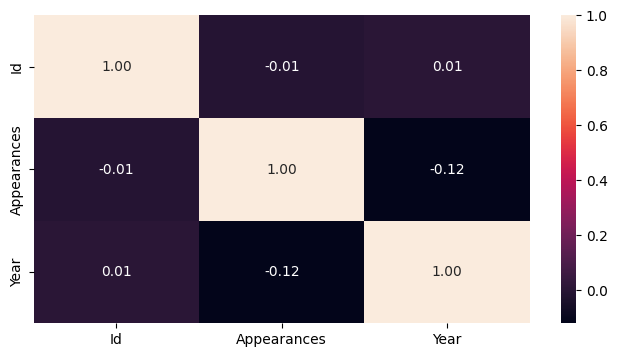

In [25]:
plt.figure(figsize = (8,4))
sns.heatmap(corr_numeric, annot = True, fmt = ".2f")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

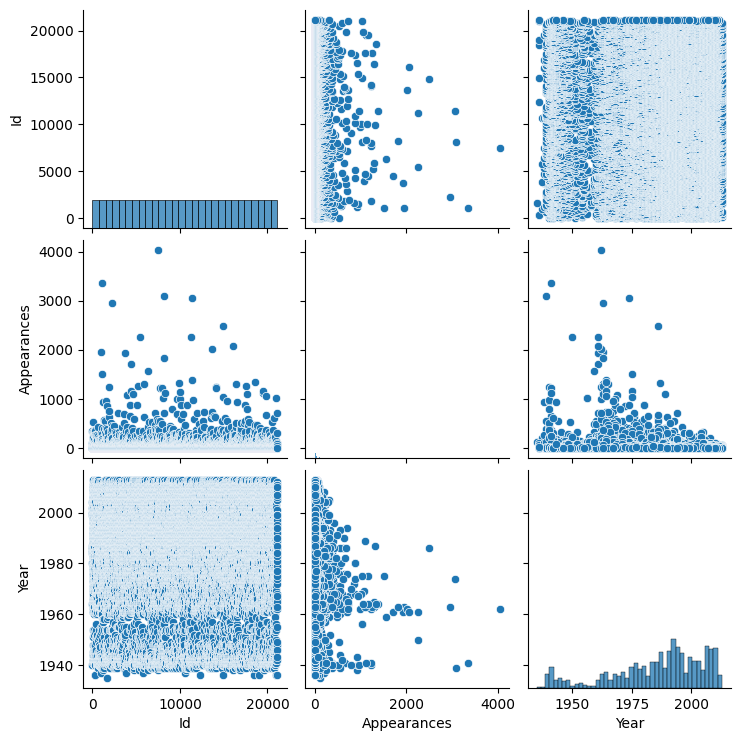

In [26]:
plt.figure(figsize = (12,6))
sns.pairplot(data)
plt.show()

It can be seen there is weak correlation for all numerical column

## Categorical Analysis

#### Universe

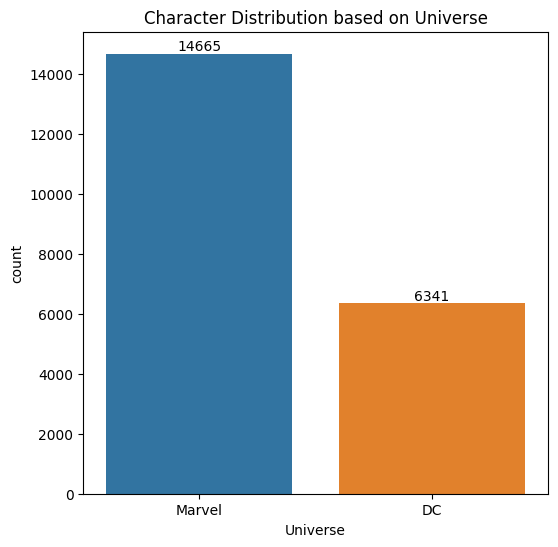

In [27]:
plt.figure(figsize= (6,6))
ax = sns.countplot(data = data, x = "Universe")
plt.title("Character Distribution based on Universe")
ax.bar_label(ax.containers[0], color = "black")
plt.show()

The most distribution of characters in the Marvel Universe

#### Planet

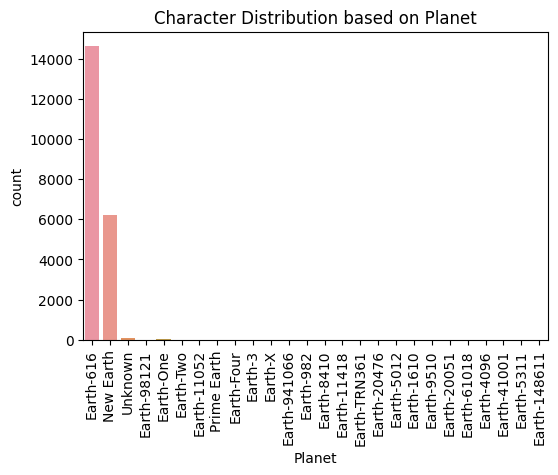

In [28]:
plt.figure(figsize= (6,4))
ax = sns.countplot(data = data, x = "Planet")
plt.title("Character Distribution based on Planet")
plt.xticks(rotation = 90)
plt.show()

The most distribution of characters in the Planet Earth-616

#### Alive

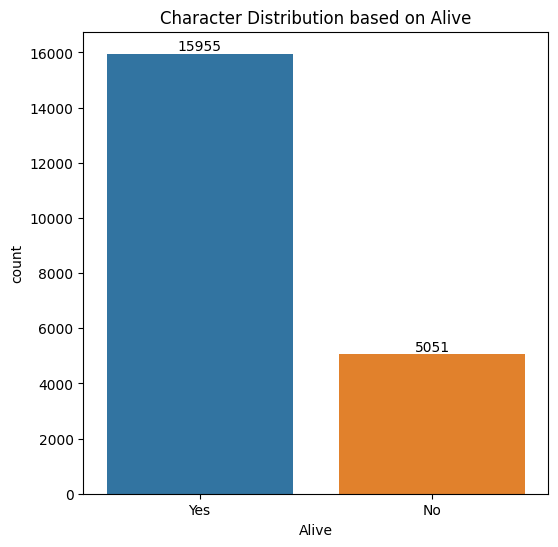

In [29]:
plt.figure(figsize= (6,6))
ax = sns.countplot(data = data, x = "Alive")
plt.title("Character Distribution based on Alive")
ax.bar_label(ax.containers[0], color = "Black")
plt.show()

Mostly character is alive

#### Sex

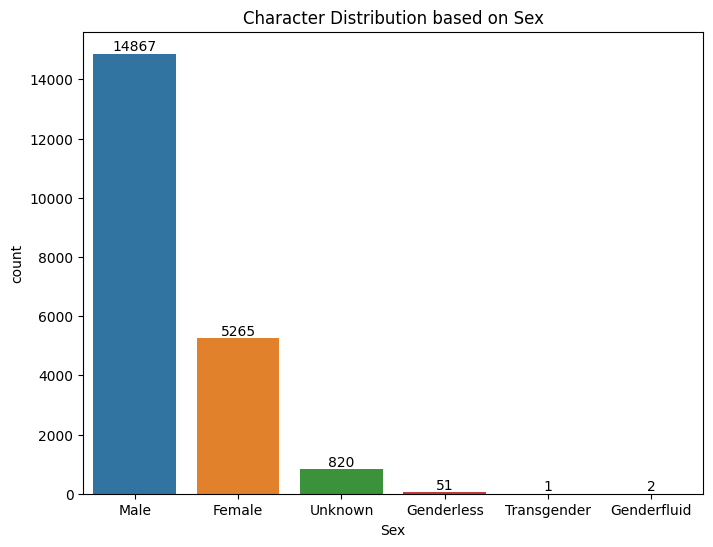

In [30]:
plt.figure(figsize= (8,6))
ax = sns.countplot(data = data, x = "Sex")
plt.title("Character Distribution based on Sex")
ax.bar_label(ax.containers[0], color = "Black")
plt.show()

The most distribution characters sex is Male

#### Hair

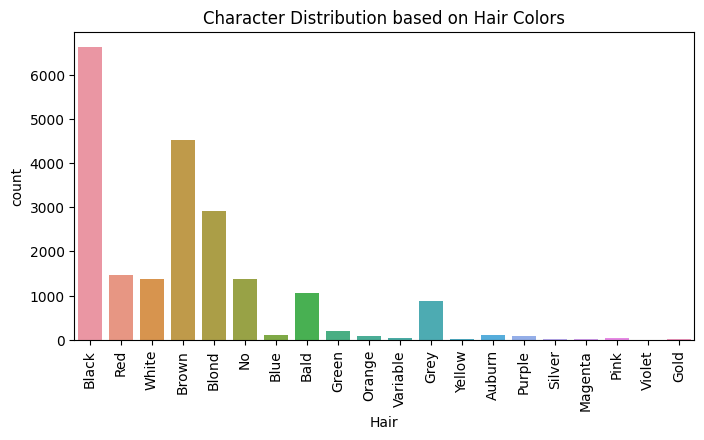

In [31]:
plt.figure(figsize= (8,4))
sns.countplot(data = data, x = "Hair")
plt.title("Character Distribution based on Hair Colors")
plt.xticks(rotation = 90)
plt.show()

The most distribution characters in hair color is Black

#### Eyes

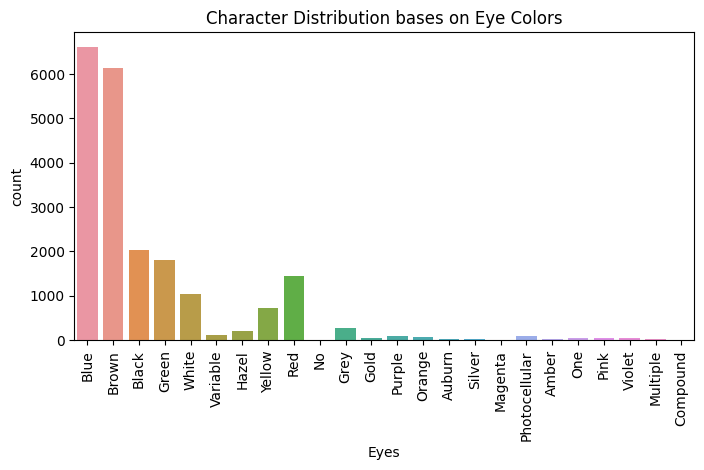

In [32]:
plt.figure(figsize= (8,4))
sns.countplot(data = data, x = "Eyes")
plt.title("Character Distribution bases on Eye Colors")
plt.xticks(rotation = 90)
plt.show()

The most distribution characters in eyes color is Blue

#### Alignment

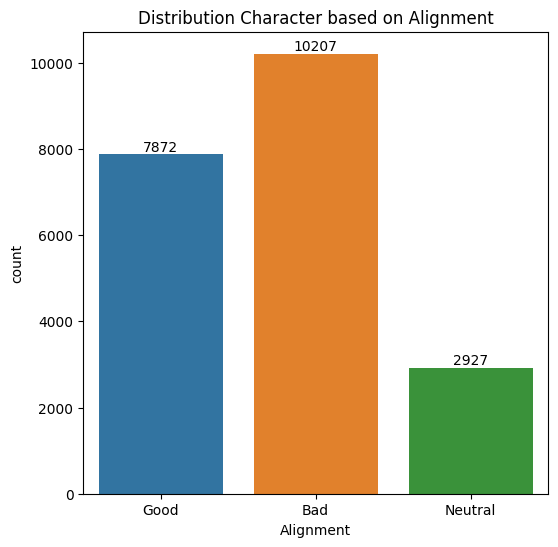

In [33]:
plt.figure(figsize = (6,6))
ax = sns.countplot(data = data, x ="Alignment")
plt.title("Distribution Character based on Alignment")
ax.bar_label(ax.containers[0], color = "Black")
plt.show()

The most distribution characters in Alignment is Bad Traits

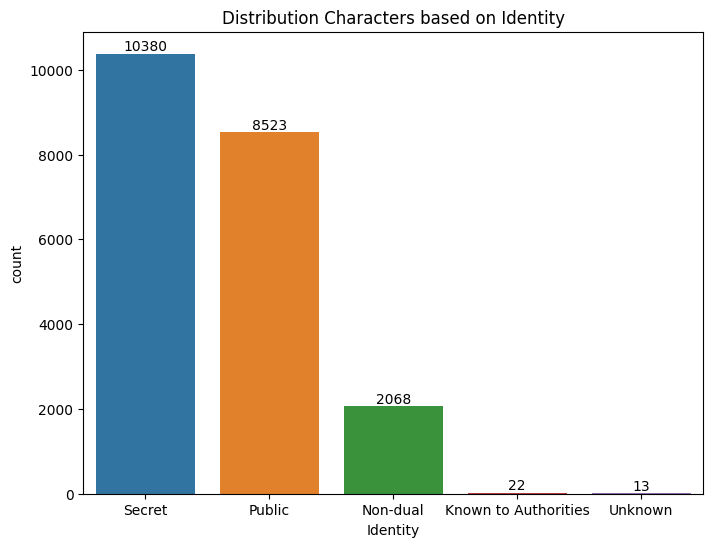

In [34]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = data, x = "Identity")
plt.title("Distribution Characters based on Identity")
ax.bar_label(ax.containers[0], color = "Black")
plt.show()

The most distribution characters in Identity is Secret

#### Appearances VS First_appear

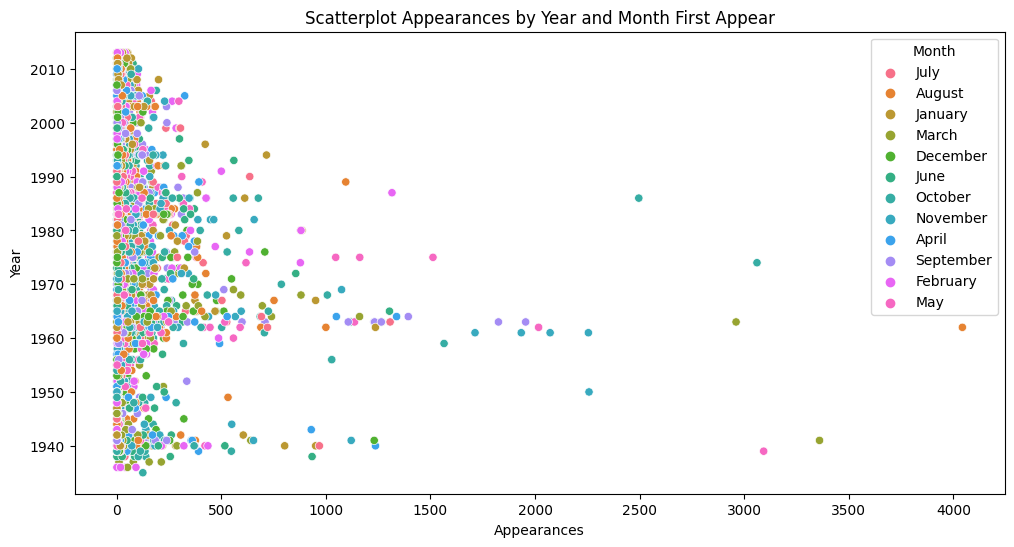

In [35]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data , x = "Appearances", y = "Year", hue = "Month")
plt.title("Scatterplot Appearances by Year and Month First Appear")
plt.show()

It can be seen that the first time a character appearances year of year mostly below 500

#### Appearances Vs Sex

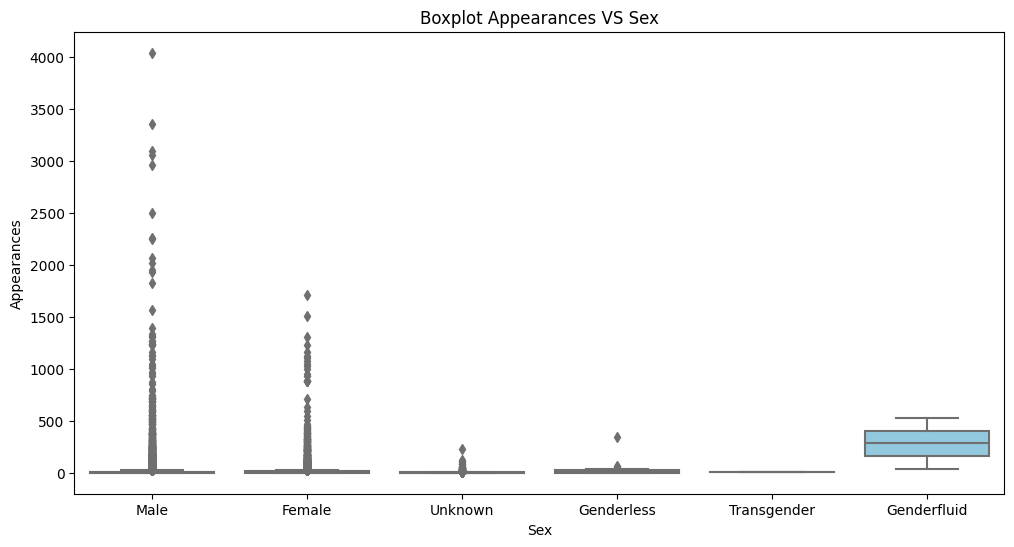

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data, x = "Sex", y = "Appearances", color = "skyblue")
plt.title("Boxplot Appearances VS Sex")
plt.show()

The most common character seen is male and have appearances above 4000 

#### Appearances Vs Alignment

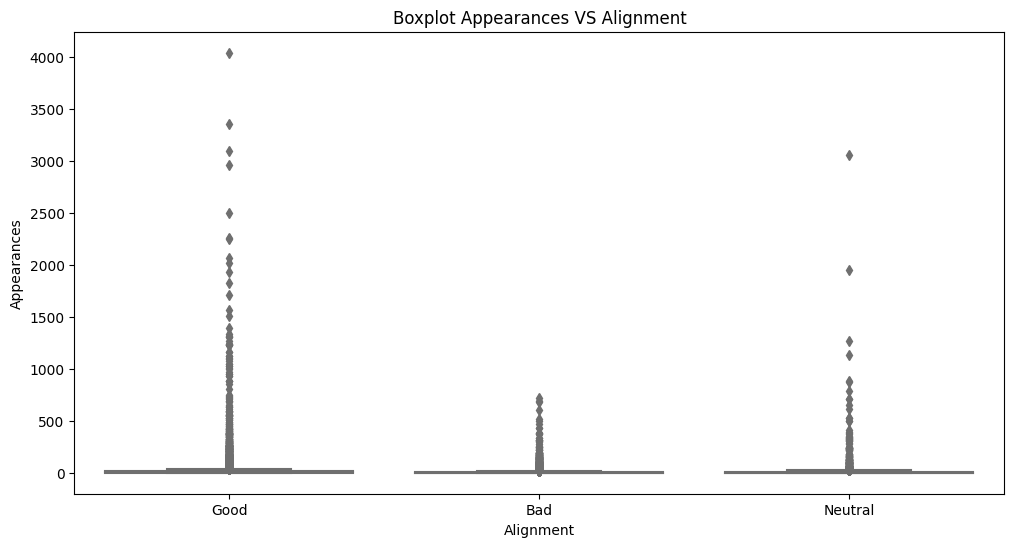

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data, x = "Alignment", y = "Appearances", color = "skyblue")
plt.title("Boxplot Appearances VS Alignment")
plt.show()

The character in good alignment have appearances above 4000

#### Appearances Vs Eyes Color

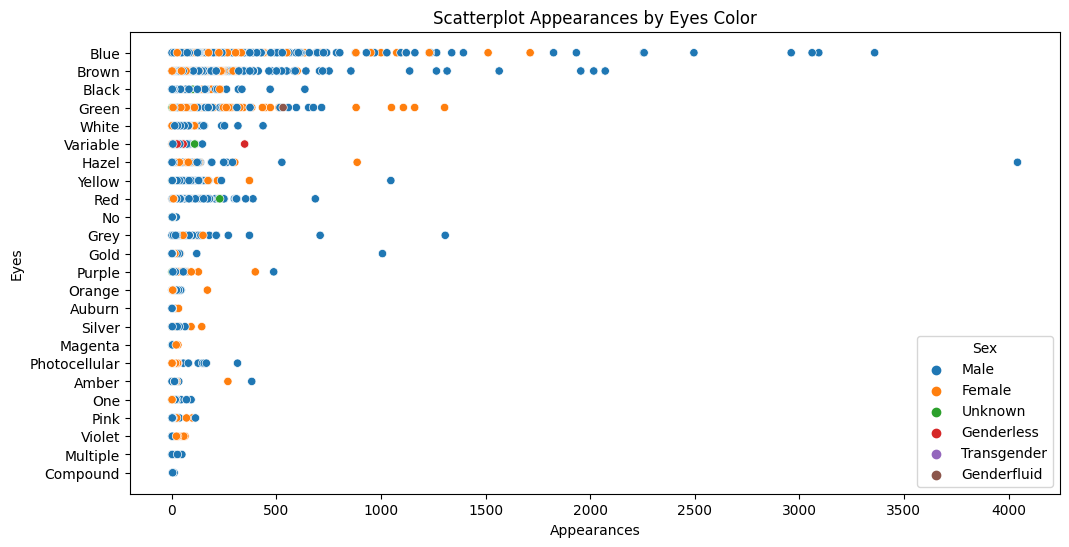

In [38]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = "Appearances", y="Eyes", hue="Sex")
plt.title("Scatterplot Appearances by Eyes Color")
plt.show()

Although the most commonly seen characters have blue eyes, but there are those with a hazel color that appearances over 4000

#### Appearances Vs Hair Color

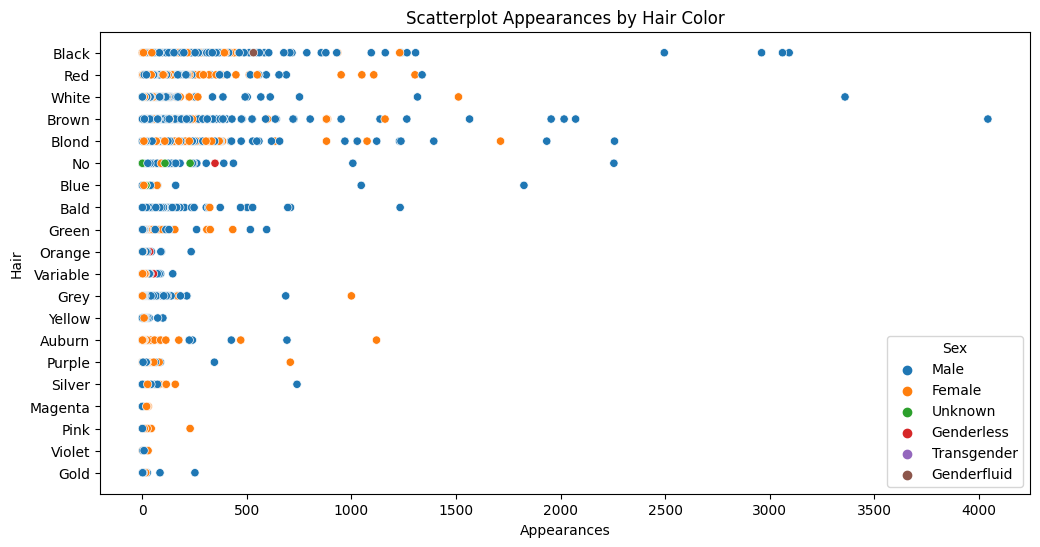

In [39]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = "Appearances", y="Hair", hue="Sex")
plt.title("Scatterplot Appearances by Hair Color")
plt.show()

Although the most commonly seen characters have Black hair, but there are those with a brown and white hair that appearances over 3000

#### Appearances Vs Appearances

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

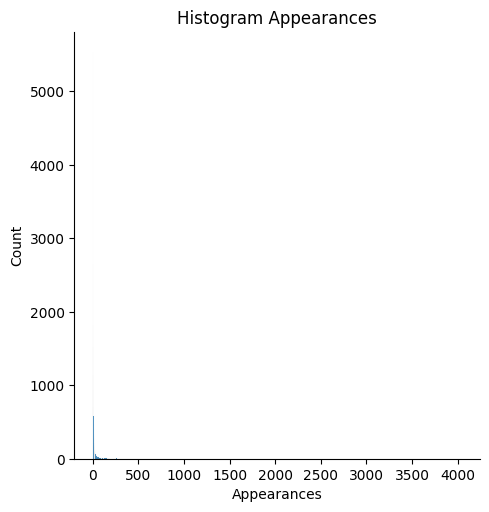

In [40]:
plt.figure(figsize = (12,6))
sns.displot(data = data, x = "Appearances")
plt.title("Histogram Appearances")
plt.show()

It can be seen that the Distribution appearances mostly below 1000

In [41]:
cond = ["Marvel","DC"]

### Distribution of each column by universe

##### Distribution Character Sex by Each Universe

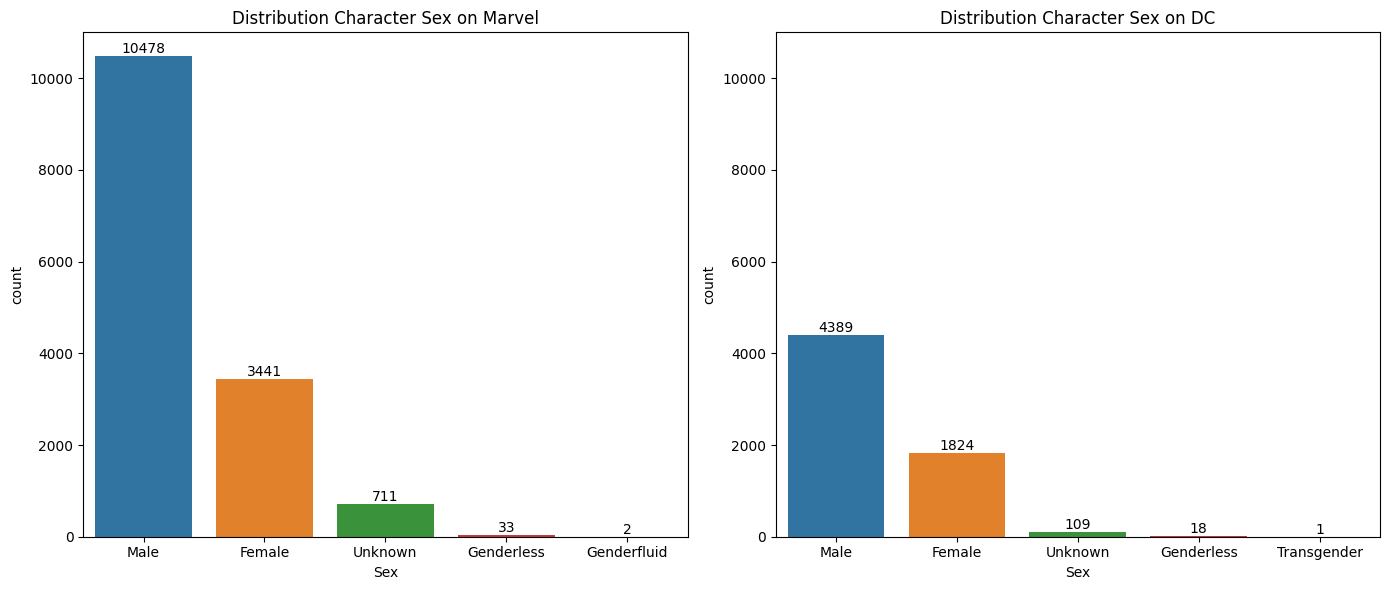

In [42]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.countplot(data = data_cond, x = "Sex")
    plt.title(label = f"Distribution Character Sex on {cond[i]}")
    plt.ylim(ymax = 11000)
    ax.bar_label(ax.containers[0], color="Black")
 
plt.tight_layout()
plt.show()

##### Distribution Character Identity by Each Universe

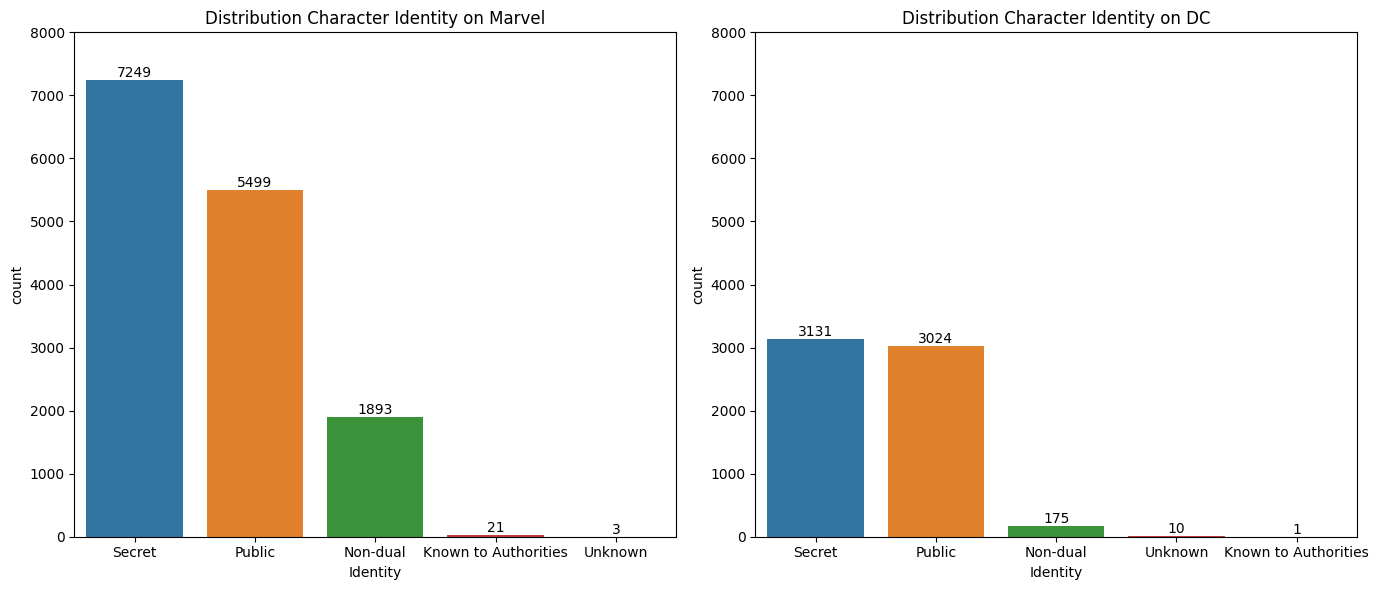

In [43]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.countplot(data = data_cond, x = "Identity")
    plt.title(label = f"Distribution Character Identity on {cond[i]}")
    plt.ylim(ymax = 8000)
    ax.bar_label(ax.containers[0], color="Black")
 
plt.tight_layout()
plt.show()

##### Distribution Character Alive by Each Universe

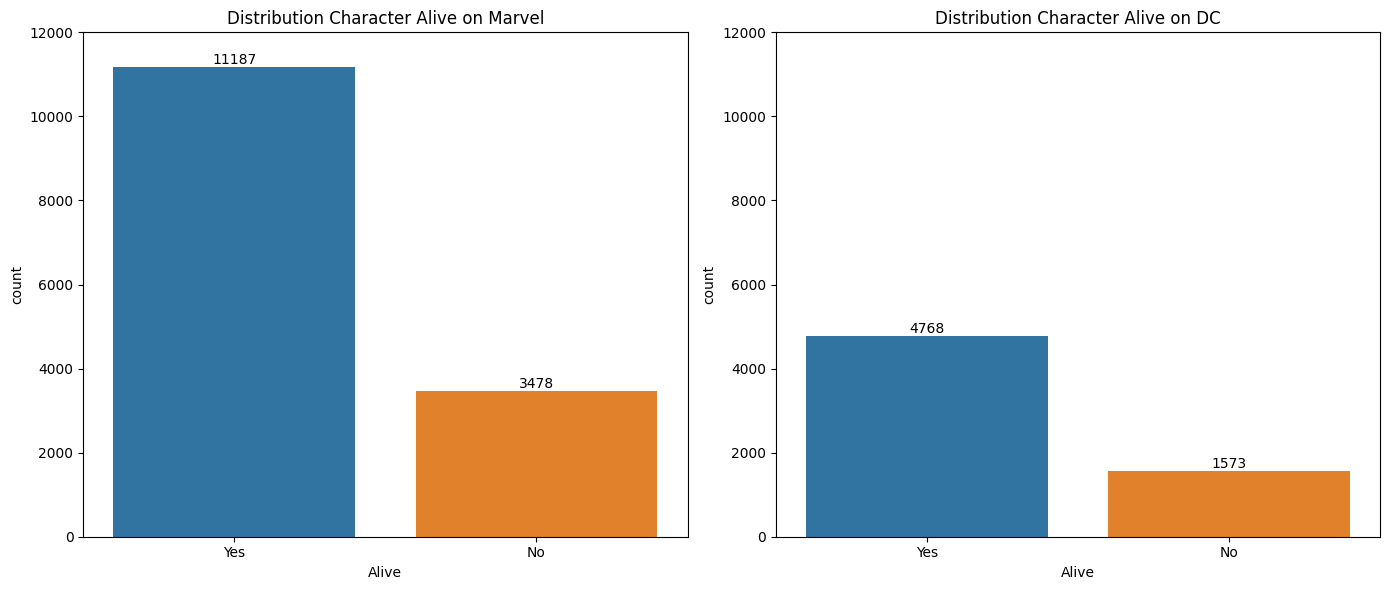

In [44]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.countplot(data = data_cond, x = "Alive")
    plt.title(label = f"Distribution Character Alive on {cond[i]}")
    plt.ylim(ymax = 12000)
    ax.bar_label(ax.containers[0], color="Black")
 
plt.tight_layout()
plt.show()

##### Distribution Character Alignment by Each Universe

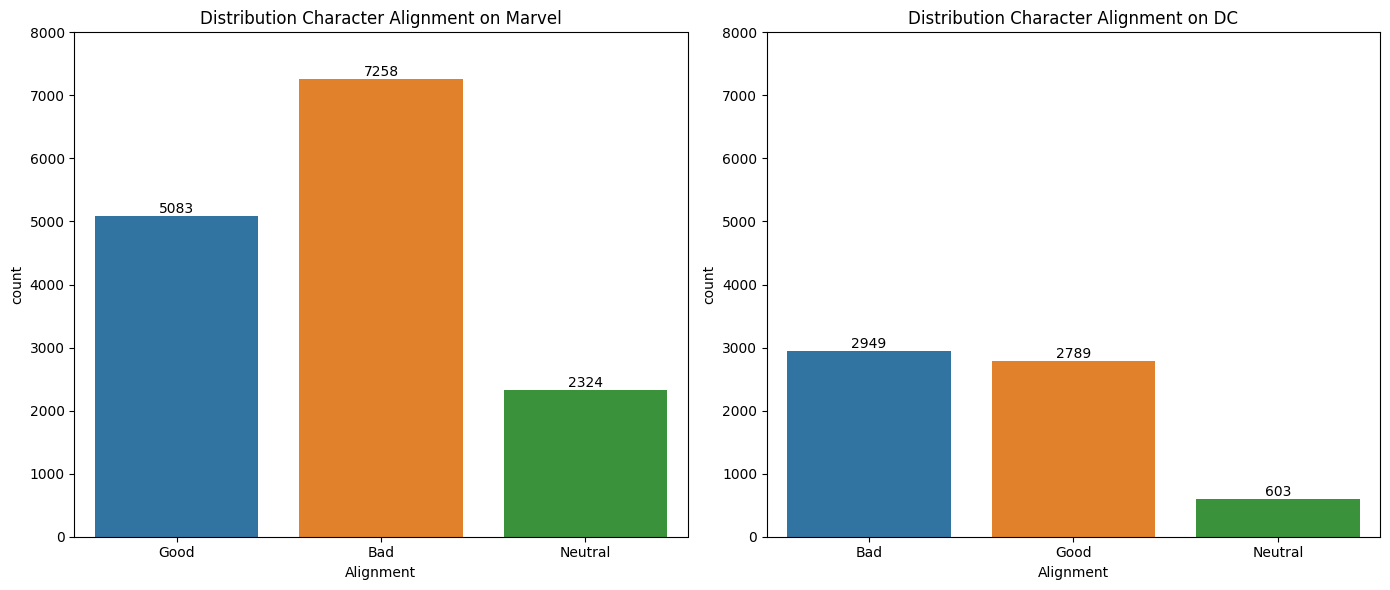

In [45]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.countplot(data = data_cond, x = "Alignment")
    plt.title(label = f"Distribution Character Alignment on {cond[i]}")
    plt.ylim(ymax = 8000)
    ax.bar_label(ax.containers[0], color="Black")
 
plt.tight_layout()
plt.show()

##### Distribution Character Eyes by Each Universe

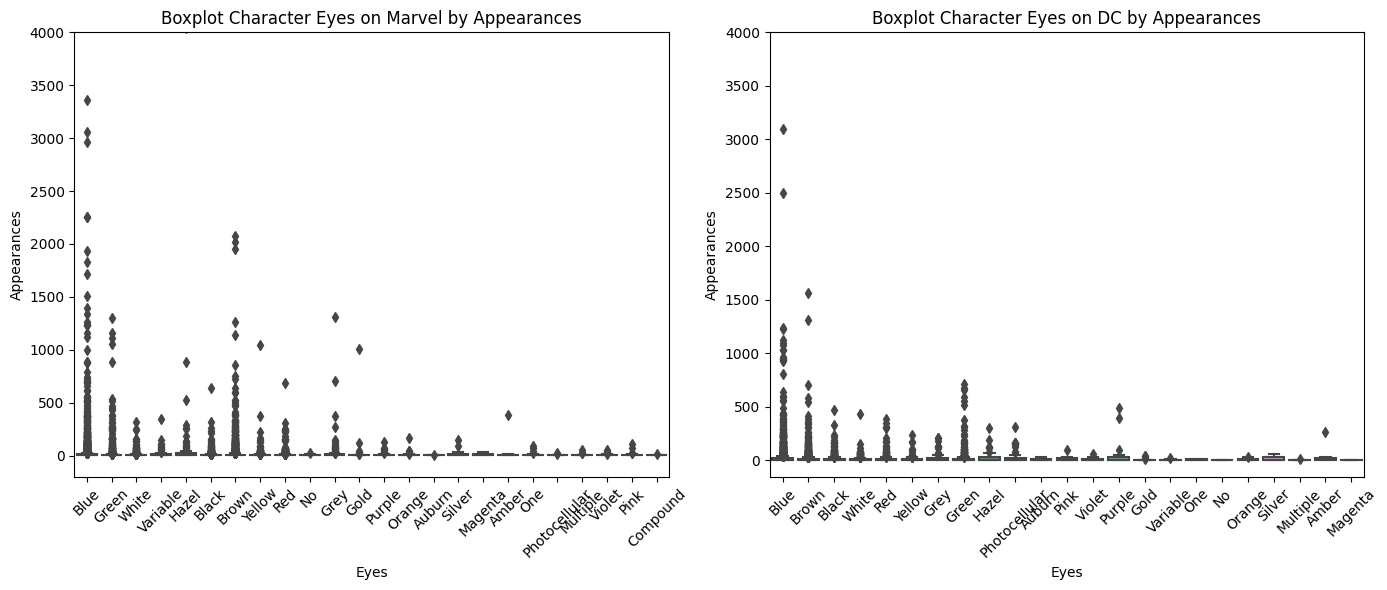

In [46]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.boxplot(data = data_cond, x = "Eyes", y ="Appearances")
    plt.title(label = f"Boxplot Character Eyes on {cond[i]} by Appearances")
    plt.xticks(rotation = 45)
    plt.ylim(ymax = 4000)
 
plt.tight_layout()
plt.show()

##### Distribution Character Hair by Each Universe

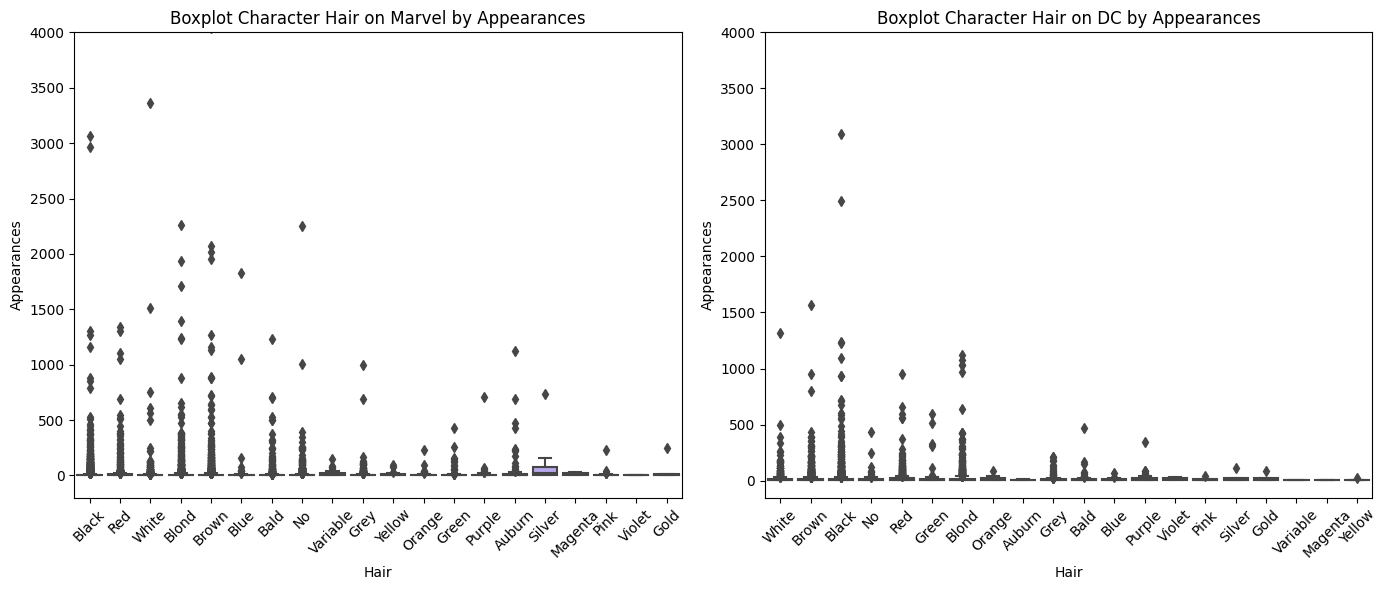

In [47]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.boxplot(data = data_cond, x = "Hair", y ="Appearances")
    plt.title(label = f"Boxplot Character Hair on {cond[i]} by Appearances")
    plt.xticks(rotation = 45)
    plt.ylim(ymax = 4000)
 
plt.tight_layout()
plt.show()

##### Distribution Character First Appear vs Appearances by Each Universe

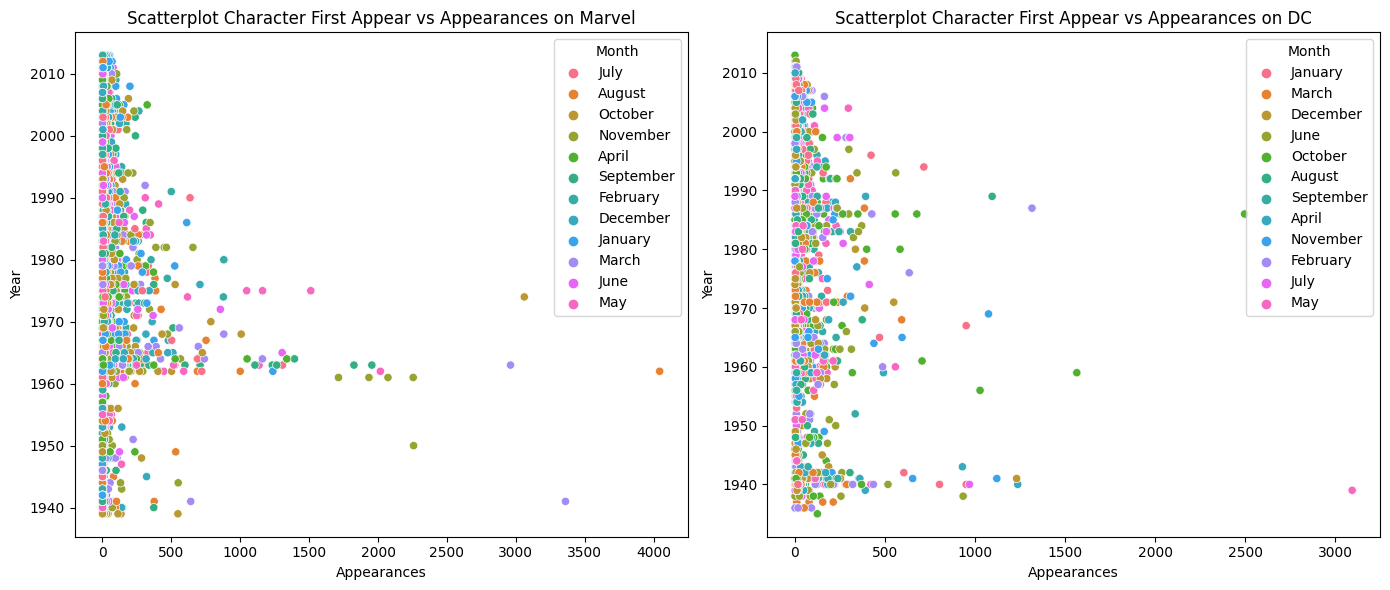

In [48]:
plt.figure(figsize = (14,6))
for i in range(len(cond)):
    data_cond = data[data["Universe"] == cond[i]]
    ax = plt.subplot(1,len(cond), i+1)
    sns.scatterplot(data = data_cond, x = "Appearances", y ="Year", hue="Month")
    plt.title(label = f"Scatterplot Character First Appear vs Appearances on {cond[i]}")
plt.tight_layout()
plt.show()

# Conclusion EDA DC-MARVEL CHARACTER

1. The columns in the dataset are mostly of object type and only 2 are of Int type.
2. The dataset does not contain missing values, but there is a column `First_appear` which is an object type while it should be a DateTime data type so a data type conversion is done first. And there is a date with the name Holiday, because there is no Holiday month name, here I drop it.
3. After converting `First_appear` and separating the columns by month and year, there are 136 missing values in the Month column. Because the missing value is below 1%, I drop the missing value data.
4. From the correlation heatmap, it can be seen that the correlation between numerical columns is weak so it is concluded that there is no strong influence between the Id, First_appear, and Appearances columns.
5. In the Barplot, it can be seen that the distribution of characters is most prevalent in the Marvel Universe compared to DC.
6. It can be seen in the boxplot and scatterplot in the 2 Universes that the gender of the characters is mostly male with the majority of blue eye color and black hair
7. In the Barplot, it can be seen that the 2 Universes have more characters who are alive than dead
8. In the Barplot, it can be seen that the character's identity in the Marvel Universe is mostly Secret while DC's secret and public identities are almost equal
9. The Boxplot shows the possibility of outliers because there are characters that appear above 1000 times.
10. In the Appearances vs First Appear Scatterplot, the distribution of data is mostly scattered mostly below 500 so it can be concluded that the characters appear on average no more than above 500 times.

# Insight

From the dataset, it is known that the Marvel Universe has more characters than the DC Universe. From both Universes, the characters are dominated by the male gender with the characteristics of blue eyes and black hair and the average appearance of the character from the first time it appears is approximately 500 times. The character traits in the Marvel Universe are dominated by bad characters, inversely proportional to the DC Universe where good characters are slightly more than bad characters.